In [174]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from lbp.localbinarypatterns import LocalBinaryPatterns
from sklearn.neighbors import KNeighborsClassifier
from imutils import paths
import cv2
import matplotlib.pyplot as plt

In [155]:
db = 'yale'
data_path = "data/" + db

points = 7
radius = 13

dataset = [file for file in paths.list_images(data_path)]

In [156]:
LBP = LocalBinaryPatterns(points, radius)

data = []
labels = []

for image_path in paths.list_images(data_path):
    
    # Read the image and convert it to grayscale
    image = cv2.imread(image_path)

    try:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        print('ERROR:', image_path)

    # Compute LBP and retrieve histogram
    hist = LBP.describe(image_gray)
    
    # Append histogram to data list and label to labels
    data.append(hist)
    labels.append(image_path.split("/")[-2])

In [157]:
# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=0, stratify=labels)

## 1. KNN

In [158]:
# Classification
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

correct_predictions = 0
all_predictions = len(y_test)

for i in range(len(y_test)):
    
    hist = X_test[i]
    prediction = knn.predict([hist])[0]

    if prediction == y_test[i]:
        correct_predictions += 1

accuracy = float(correct_predictions * 100 / all_predictions)
print("Accuracy = ", accuracy)

Accuracy =  68.0


In [159]:
y_pred = knn.predict(X_test)

In [160]:
print("Accuracy = ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy =  0.68
              precision    recall  f1-score   support

          01       1.00      0.75      0.86         4
          02       0.67      0.67      0.67         3
          03       0.67      0.67      0.67         3
          04       1.00      0.25      0.40         4
          05       1.00      0.67      0.80         3
          06       0.75      0.75      0.75         4
          07       0.50      1.00      0.67         3
          08       0.60      1.00      0.75         3
          09       0.33      0.33      0.33         3
          10       0.67      0.67      0.67         3
          11       0.75      1.00      0.86         3
          12       0.67      0.50      0.57         4
          13       0.67      1.00      0.80         4
          14       1.00      0.33      0.50         3
          15       0.67      0.67      0.67         3

    accuracy                           0.68        50
   macro avg       0.73      0.68      0.66        50
weighted 

In [161]:
# Classification
accuracies = []
x = range(1, 20, 1)
for k in x:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

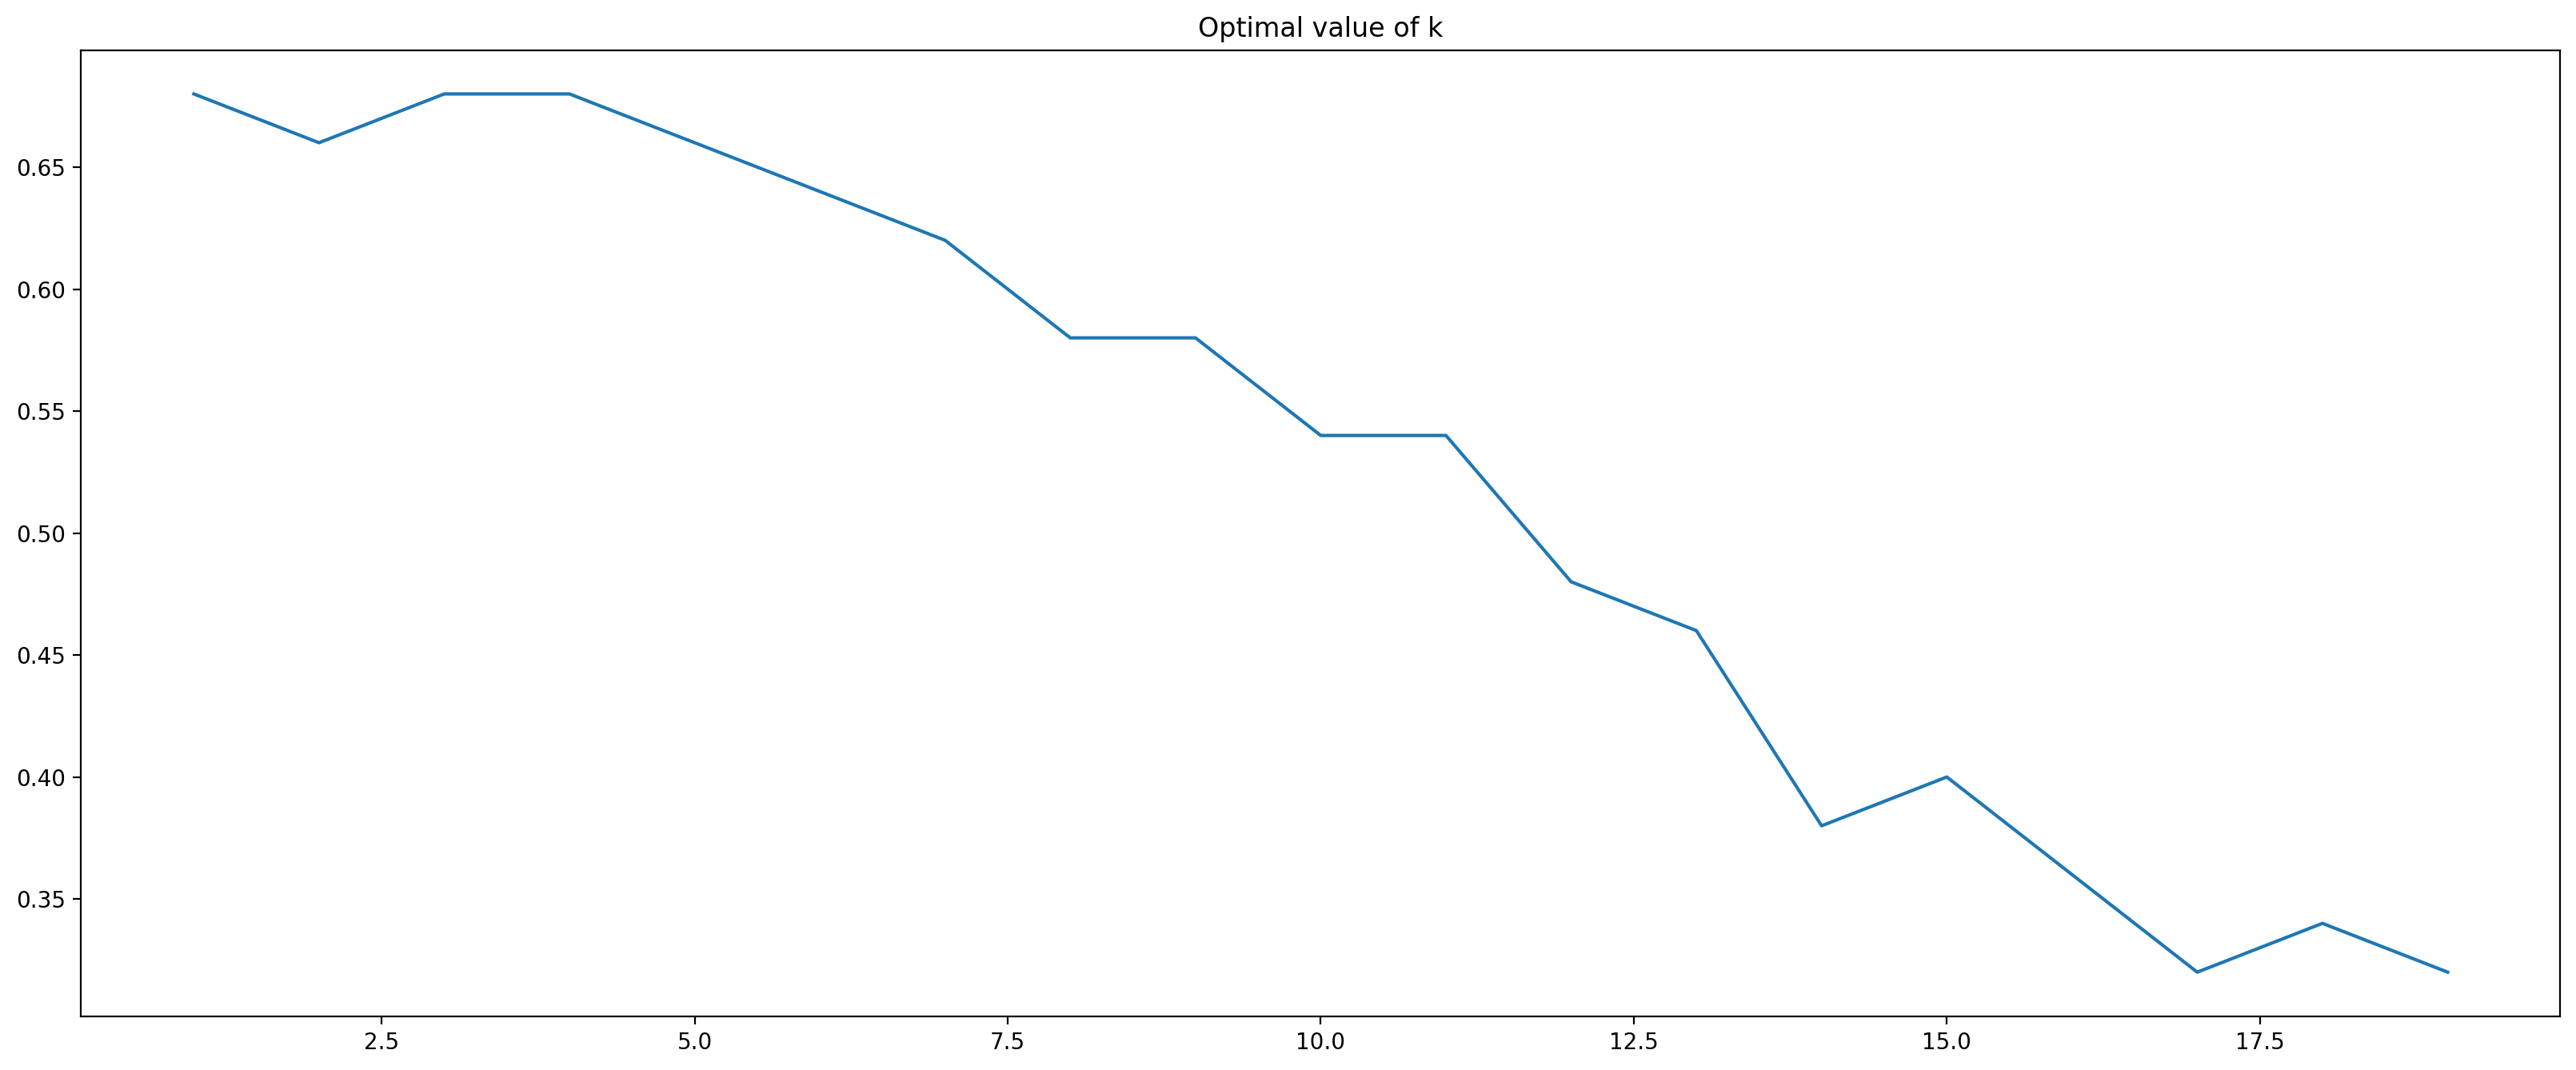

In [162]:
fig = plt.figure(figsize=(20, 8), dpi=200, facecolor='white')
plt.plot(list(x), accuracies)
plt.title("Optimal value of k")
plt.savefig('visualizations/knn.png', format='png', bbox_inches='tight')
plt.show()

## 2. SVM

In [163]:
from sklearn.svm import LinearSVC

In [167]:
db = 'yale'
data_path = "data/" + db

points = 12
radius = 14

dataset = [file for file in paths.list_images(data_path)]

In [168]:
LBP = LocalBinaryPatterns(points, radius)

data = []
labels = []

for image_path in paths.list_images(data_path):
    
    # Read the image and convert it to grayscale
    image = cv2.imread(image_path)

    try:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        print('ERROR:', image_path)

    # Compute LBP and retrieve histogram
    hist = LBP.describe(image_gray)
    
    # Append histogram to data list and label to labels
    data.append(hist)
    labels.append(image_path.split("/")[-2])

In [169]:
# Split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=0, stratify=labels)

In [170]:
# train a Linear SVM on the data
model = LinearSVC(C=100.0, random_state=42, max_iter=5000)
model.fit(X_train,y_train)

LinearSVC(C=100.0, max_iter=5000, random_state=42)

In [171]:
y_pred=model.predict(X_test)

In [172]:
print("Accuracy = ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy =  0.62
              precision    recall  f1-score   support

          01       1.00      0.75      0.86         4
          02       0.40      0.67      0.50         3
          03       0.40      0.67      0.50         3
          04       1.00      0.50      0.67         4
          05       1.00      0.67      0.80         3
          06       0.50      0.75      0.60         4
          07       1.00      0.67      0.80         3
          08       0.00      0.00      0.00         3
          09       0.33      0.33      0.33         3
          10       1.00      1.00      1.00         3
          11       0.60      1.00      0.75         3
          12       0.40      0.50      0.44         4
          13       0.67      0.50      0.57         4
          14       1.00      0.67      0.80         3
          15       0.50      0.67      0.57         3

    accuracy                           0.62        50
   macro avg       0.65      0.62      0.61        50
weighted 

## Plots

In [153]:
k = 3
radius = 13
x = range(1, 20, 2)

accuracies = []
for points in x:
    LBP = LocalBinaryPatterns(points, radius)

    data = []
    labels = []

    for image_path in paths.list_images(data_path):
        
        # Read the image and convert it to grayscale
        image = cv2.imread(image_path)

        try:
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        except:
            print('ERROR:', image_path)

        # Compute LBP and retrieve histogram
        hist = LBP.describe(image_gray)
        
        # Append histogram to data list and label to labels
        data.append(hist)
        labels.append(image_path.split("/")[-2])
    
    # Split train and test datasets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=0, stratify=labels)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

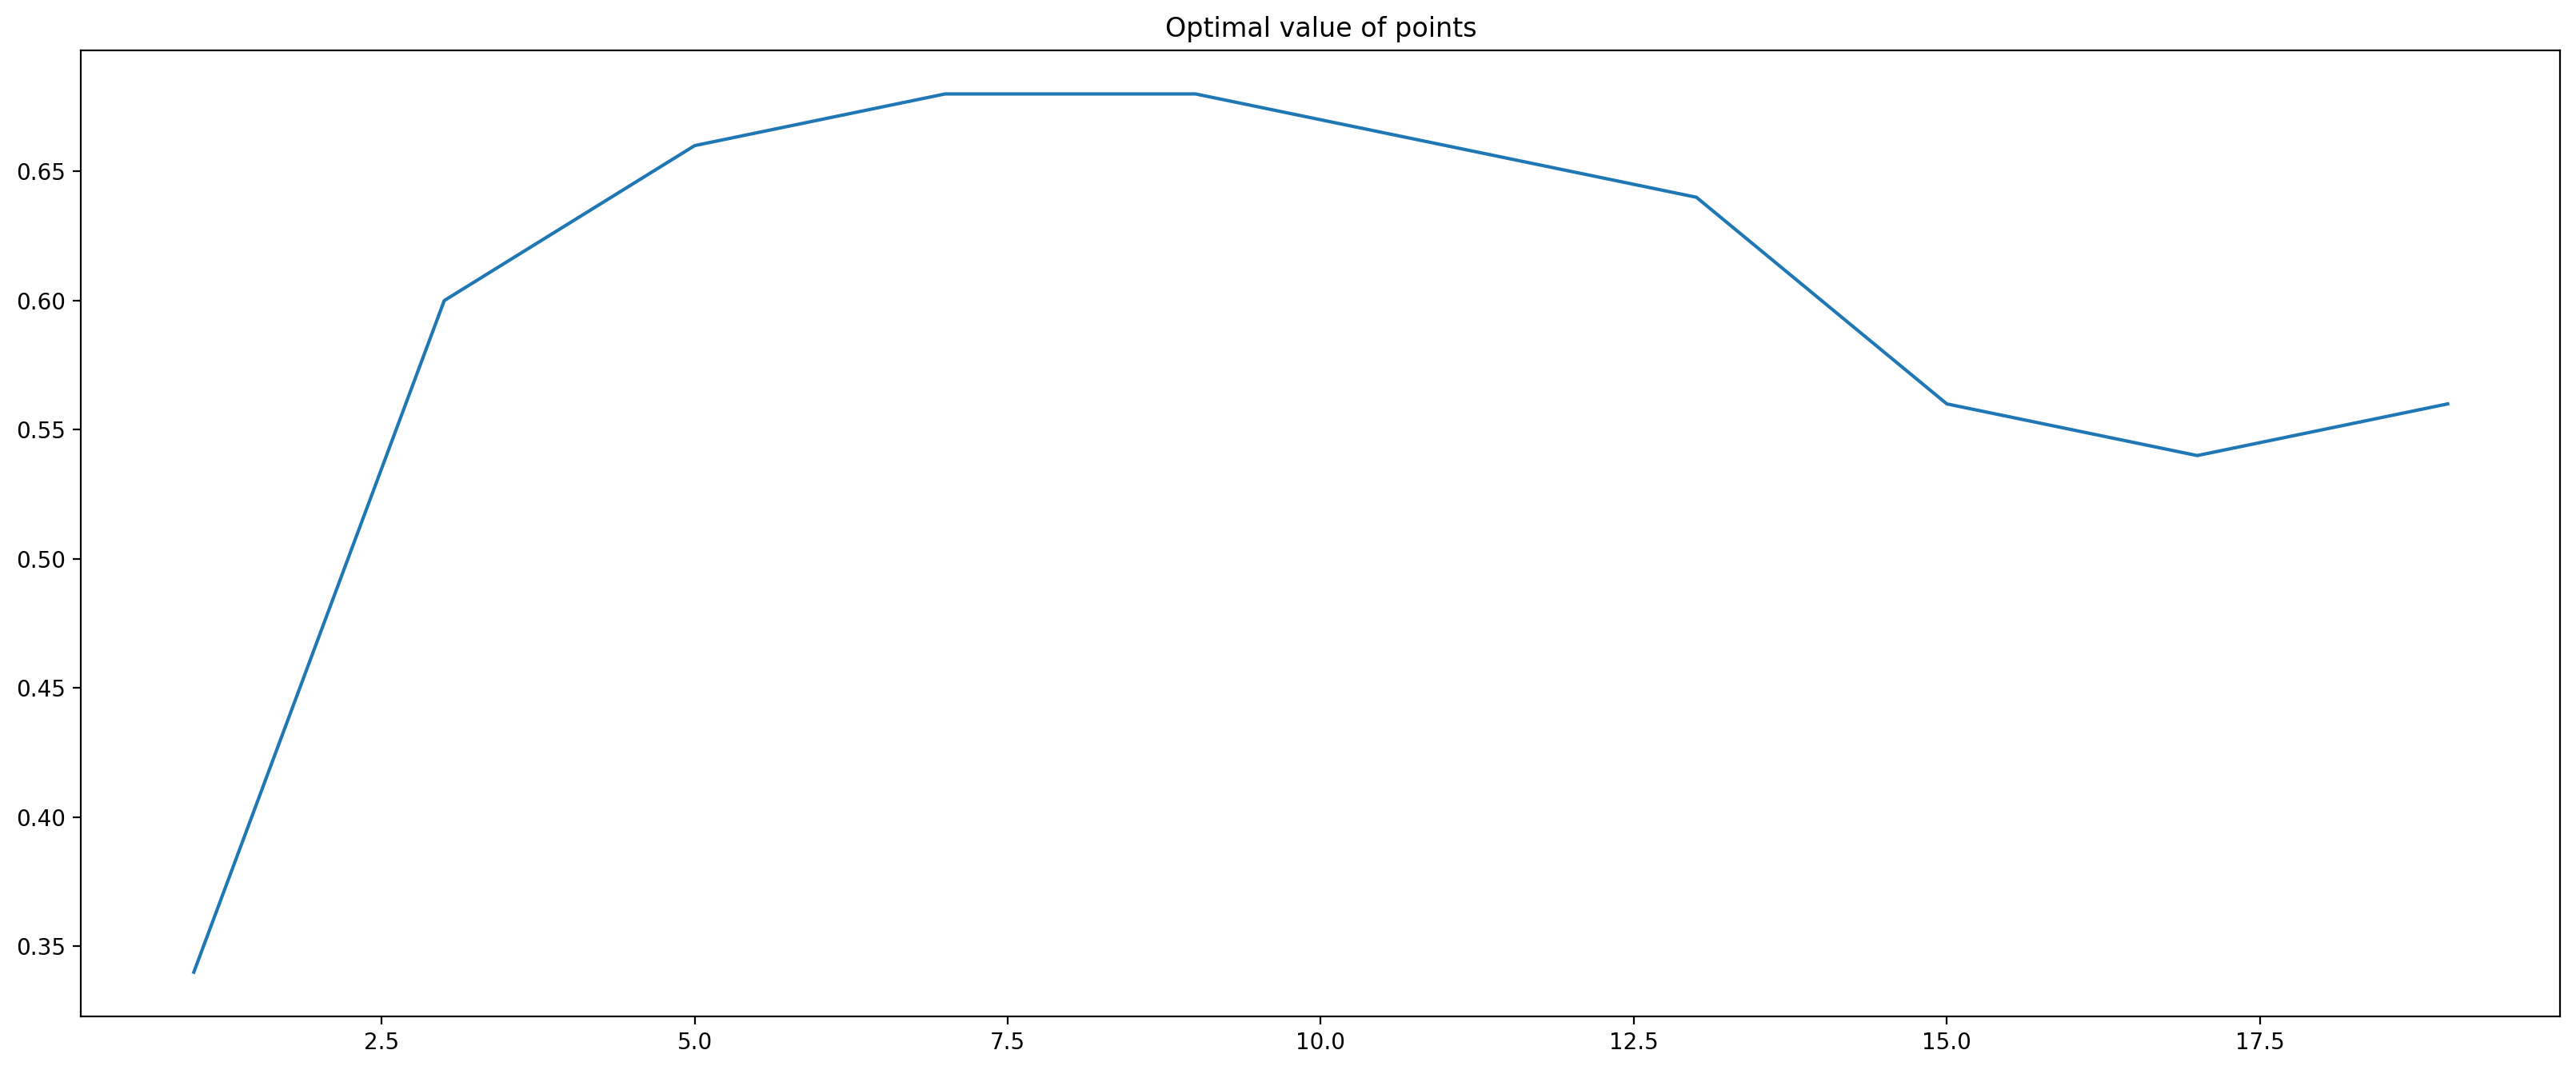

In [154]:
fig = plt.figure(figsize=(20, 8), dpi=200, facecolor='white')
plt.plot(x, accuracies)
plt.title("Optimal value of points")
plt.savefig('visualizations/points.png', format='png', bbox_inches='tight')
plt.show()

In [151]:
k = 3
points = 7
x = range(1, 20, 2)

accuracies = []
for radius in x:
    LBP = LocalBinaryPatterns(points, radius)

    data = []
    labels = []

    for image_path in paths.list_images(data_path):
        
        # Read the image and convert it to grayscale
        image = cv2.imread(image_path)

        try:
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        except:
            print('ERROR:', image_path)

        # Compute LBP and retrieve histogram
        hist = LBP.describe(image_gray)
        
        # Append histogram to data list and label to labels
        data.append(hist)
        labels.append(image_path.split("/")[-2])
    
    # Split train and test datasets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=0, stratify=labels)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

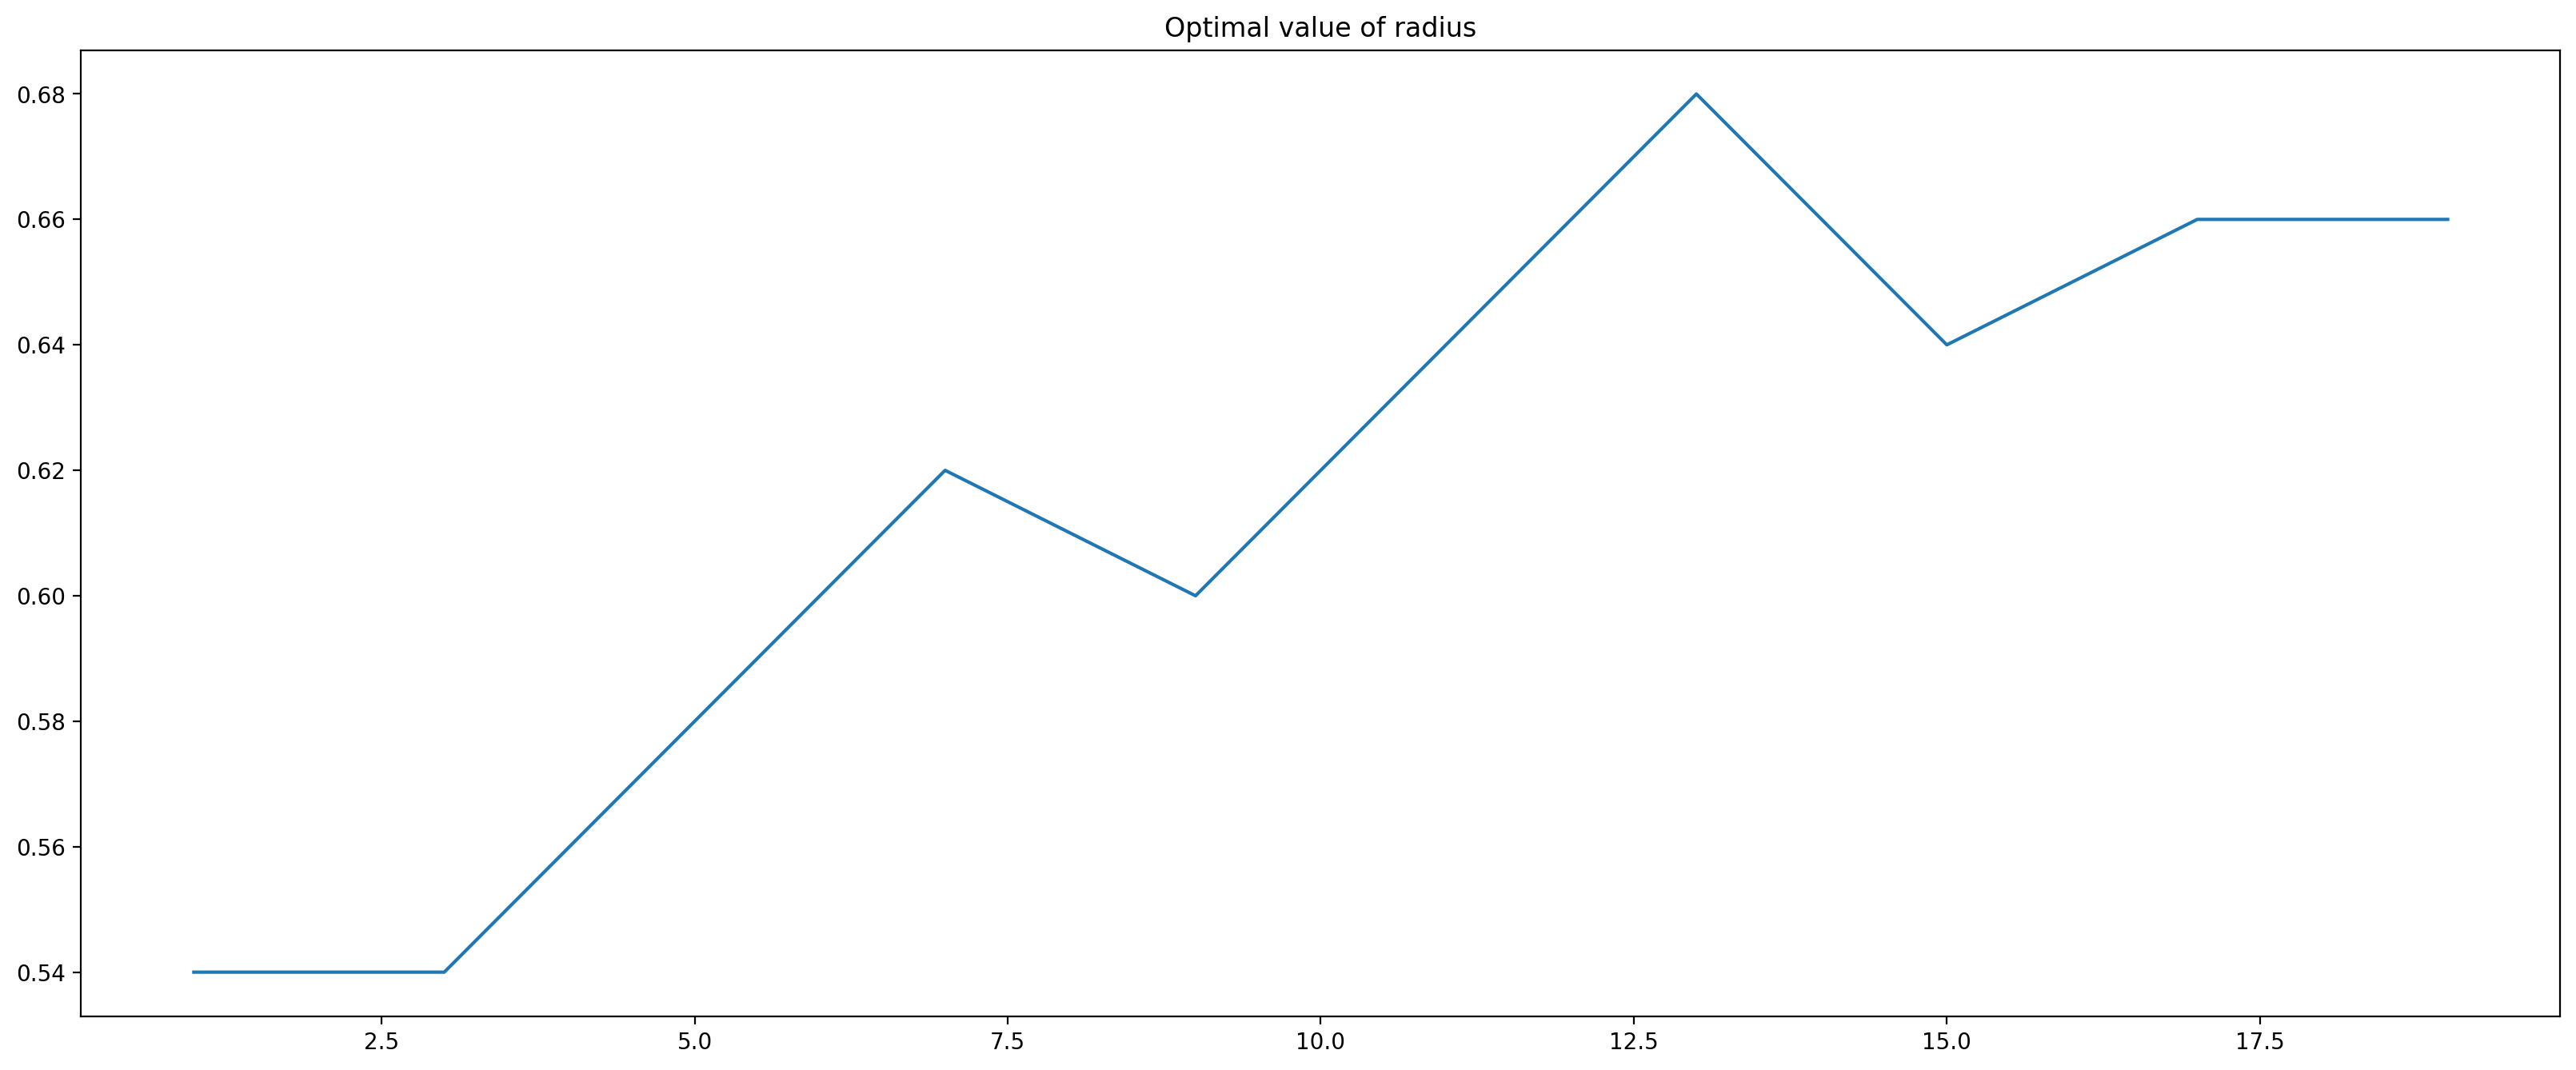

In [152]:
fig = plt.figure(figsize=(20, 8), dpi=200, facecolor='white')
plt.plot(x, accuracies)
plt.title("Optimal value of radius")
plt.savefig('visualizations/radius.png', format='png', bbox_inches='tight')
plt.show()